<a href="https://colab.research.google.com/github/abhi-11nav/Car-price-prediction/blob/main/Car_price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [44]:
import numpy as np 
import pandas as pd

# Dataset Credits

https://www.kaggle.com/datasets/nehalbirla/vehicle-dataset-from-cardekho

In [45]:
url = "https://raw.githubusercontent.com/abhi-11nav/Car-price-prediction/main/CAR%20DETAILS%20FROM%20CAR%20DEKHO.csv.xls"

In [46]:
dataset = pd.read_csv(url)

In [47]:
dataset.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [48]:
dataset.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner'],
      dtype='object')

In [49]:
dataset["name"].value_counts()

Maruti Swift Dzire VDI                     69
Maruti Alto 800 LXI                        59
Maruti Alto LXi                            47
Maruti Alto LX                             35
Hyundai EON Era Plus                       35
                                           ..
Hyundai Verna Transform CRDi VGT SX ABS     1
Maruti S-Presso VXI Plus                    1
Toyota Etios Liva 1.2 VX                    1
Toyota Yaris G                              1
Hyundai i20 Magna 1.4 CRDi                  1
Name: name, Length: 1491, dtype: int64

In [50]:
# Since the "name" feature does not add much value to the output and consists of moslty unique values, we eliminate the feature

dataset.drop("name",axis=1,inplace=True)

In [51]:
dataset.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [52]:
# Inspecting the dataset for missing values

dataset.isna().any()

year             False
selling_price    False
km_driven        False
fuel             False
seller_type      False
transmission     False
owner            False
dtype: bool

There are no missing values in the dataset

In [53]:
# Printing the number of values in categorical columns

for x in dataset.columns:
  if type(dataset[x][0]) != np.int64:
    print(dataset[x].value_counts(),"\n")

Diesel      2153
Petrol      2123
CNG           40
LPG           23
Electric       1
Name: fuel, dtype: int64 

Individual          3244
Dealer               994
Trustmark Dealer     102
Name: seller_type, dtype: int64 

Manual       3892
Automatic     448
Name: transmission, dtype: int64 

First Owner             2832
Second Owner            1106
Third Owner              304
Fourth & Above Owner      81
Test Drive Car            17
Name: owner, dtype: int64 



In [63]:
# Since we do not have much data on electric cars, we eliminate the electric car from the dataset

dataset.drop(dataset.index[dataset['fuel']=="Electric"],inplace=True)

In [65]:
# Verifying if the specified category of the feature has been eliminated

dataset["fuel"].value_counts()

Diesel    2153
Petrol    2123
CNG         40
LPG         23
Name: fuel, dtype: int64

We can see that "Electric" category has been dropped from the feature

# Exploratory Data Analysis

In [68]:
# Importing visualizatin libraries

import matplotlib.pyplot as plt 
%matplotlib inline 

import seaborn as sns

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


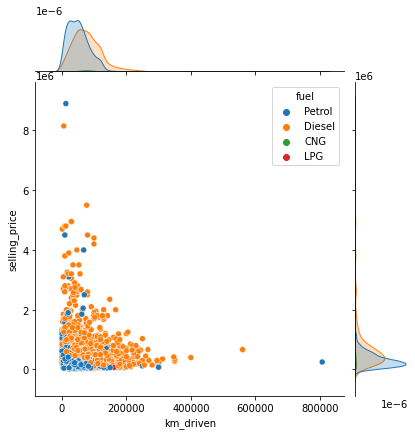

In [72]:
sns.jointplot(dataset['km_driven'],dataset['selling_price'],hue=dataset["fuel"])

### Observation :

We can notice that diesel vehicles have a bit higher selling price when compare to vehicles with fuel type as petrol given that kilometers driven is under 30000 km (approximate value). Although, we cannot say much about CNG and LPG fuel types as the available data is low and also cannot comment about all the fuel types after 400000 kms range.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


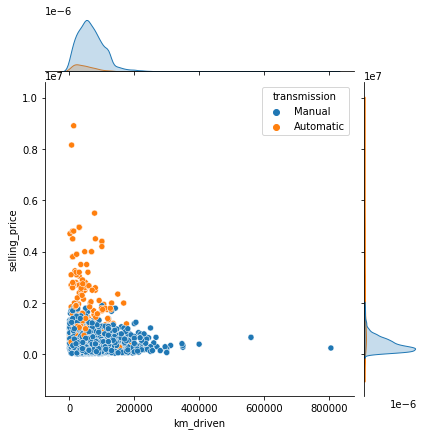

In [74]:
sns.jointplot(dataset['km_driven'],dataset['selling_price'],hue=dataset["transmission"])

### Observation:

We can see that automatic cars have a higher selling price under 20000 kilometers drive range when compared to the manual transmission cars

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


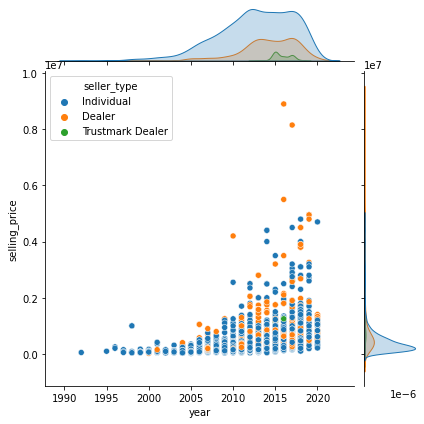

In [77]:
sns.jointplot(dataset['year'],dataset['selling_price'],hue=dataset["seller_type"])

### Observation:

The main takeaway is that the selling price is going up with time. We can see that the selling price is increasing year by year irrespective of the seller type. Although we cannot see much of a difference between individual seller and dealers, we can note that dealers selling cars has increased substantially over the years.

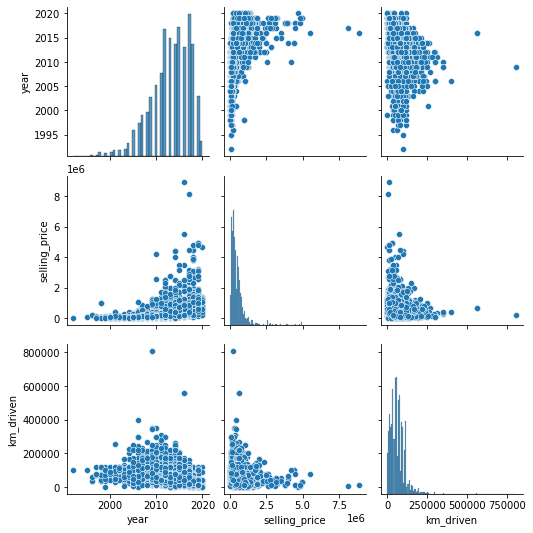

In [79]:
sns.pairplot(dataset)

We can have a look at the distribution of numerical data after normalizing the dataset

# ENCODING CATEGORICAL VARIABLES

In [81]:
dataset.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,2014,450000,141000,Diesel,Individual,Manual,Second Owner


There are threee categorical variables. So we have to convert them into numerical variables in order to proceed further with the dataset

In [82]:
dataset["owner"].value_counts()

First Owner             2832
Second Owner            1105
Third Owner              304
Fourth & Above Owner      81
Test Drive Car            17
Name: owner, dtype: int64

In [83]:
# Ordinal encoding for owner as the order is meaningful

owner_dict = {
    "First Owner" : 1,
    "Second Owner": 2,
    "Third Owner": 3,
    "Fourth & Above Owner":4,
    "Test Drive Car": 5
}

dataset["owner_ordinal"] = dataset['owner'].map(owner_dict)

In [84]:
# Verifying that ordinal encoding is done for "owner" feature

dataset.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,owner_ordinal
0,2007,60000,70000,Petrol,Individual,Manual,First Owner,1
1,2007,135000,50000,Petrol,Individual,Manual,First Owner,1
2,2012,600000,100000,Diesel,Individual,Manual,First Owner,1
3,2017,250000,46000,Petrol,Individual,Manual,First Owner,1
4,2014,450000,141000,Diesel,Individual,Manual,Second Owner,2


In [ ]:
# Dropping the "owner" feature as it is already encoded
dataset.drop("owner",inplace=True,axis=1)

In [89]:
!pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 69 kB 2.8 MB/s 


In [94]:
# Binary encoding for other categorical variables usking sklearn

import sklearn 
import category_encoders as encoder

encoder = encoder.BinaryEncoder()

encoded_data = encoder.fit_transform(dataset)

In [95]:
encoded_data

,year,selling_price,km_driven,fuel_0,fuel_1,fuel_2,seller_type_0,seller_type_1,transmission_0,transmission_1,owner_ordinal
0,2007,60000,70000,0,0,1,0,1,0,1,1
1,2007,135000,50000,0,0,1,0,1,0,1,1
2,2012,600000,100000,0,1,0,0,1,0,1,1
3,2017,250000,46000,0,0,1,0,1,0,1,1
4,2014,450000,141000,0,1,0,0,1,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...
4335,2014,409999,80000,0,1,0,0,1,0,1,2
4336,2014,409999,80000,0,1,0,0,1,0,1,2
4337,2009,110000,83000,0,0,1,0,1,0,1,2
4338,2016,865000,90000,0,1,0,0,1,0,1,1


In [101]:
# Combining the encoded columns

encoded_data['fuel'] = encoded_data["fuel_0"]+encoded_data["fuel_1"]+encoded_data["fuel_2"]

encoded_data['transmission']=encoded_data['transmission_0']+encoded_data['transmission_1']

encoded_data['seller_type'] =encoded_data['seller_type_0']+encoded_data['seller_type_1'] 

In [103]:
encoded_data.drop(["fuel","seller_type","transmission"],inplace=True,axis=1)

# That was a bad idea

In [120]:
"""for x in dataset.columns:
  if type(dataset[x][0]) == str:
    for y in dataset[x].value_counts().index:
      print(dataset.index[dataset[x]==y][0],"corresponding to", encoded_data.index[dataset[x]==y][0])"""

'for x in dataset.columns:\n  if type(dataset[x][0]) == str:\n    for y in dataset[x].value_counts().index:\n      print(dataset.index[dataset[x]==y][0],"corresponding to", encoded_data.index[dataset[x]==y][0])'

#### Fuel_type
Petrol = 001,
Diesel = 010,
CNG == 011,
LPG == 100

#### Seller_type

Individual == 01,
Dealer == 10,
Trustmark Dealer == 11

#### Transmission
Manual == 01,
Automatic == 10